1.Begining 

1.1 tools

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
%matplotlib inline 

1.2 Import Data

In [9]:
train =  pd.read_csv("train.csv")
test =  pd.read_csv("test.csv")

2.Data mining

2.1 Data preprocessing

In [10]:
#Data size
train.shape

(1460, 81)

In [11]:
#Data information Data has object int float and null value. 
#String type and split feature need to be separated. Further coding is required.
train.info()    
print('......................')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
#Data browsing
train.head()
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [13]:
#analysis of null
print('train is null：',train.isnull().values.sum())
print('test is null：',test.isnull().values.sum())
train.isnull().sum()
print('----------------------------------------------------------')
test.isnull().sum()

train is null： 6965
test is null： 7000
----------------------------------------------------------


Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [14]:
#Statistical analysis of data Numerical
train.describe()
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [15]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

2.2 Analysis of target y

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


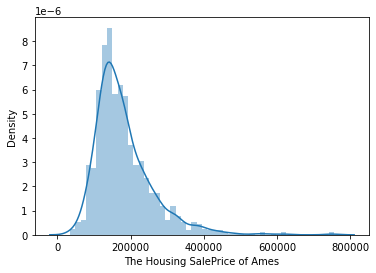

In [16]:
#Target y analysis SalePrice histogram, left-leaning 
#There are some houses with higher prices, consider taking the logarithm
plt.figure()
sns.distplot(train.SalePrice,bins = 50,kde = True)  #kde=true: Show density curve
plt.xlabel('The Housing SalePrice of Ames')
train.SalePrice.skew()
plt.show()
#sns.distplot(np.log(data_train.SalePrice),bins = 40,kde = True)

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


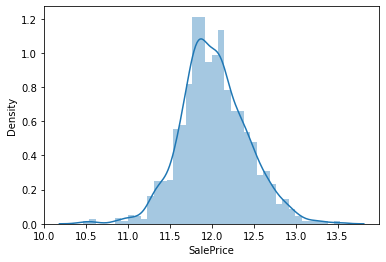

In [17]:
#Logarithmic analysis         Close to normal distribution
log_SalePrice = np.log(train.SalePrice)
sns.distplot(log_SalePrice,bins = 40,kde = True)
log_SalePrice.skew()  #The skewness value is close to 0，close to normal distribution
plt.show()

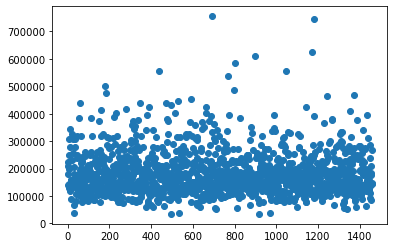

In [18]:
#Target y analysis SalePrice scatter plot Consider removing samples with higher prices 400000
plt.scatter(range(train.shape[0]),train.SalePrice.values)  #All lines and prices
plt.show()

2.3 Feature correlation analysis

In [19]:
#Numerical feature correlation
#Use corr() function to find correlation between columns
data_corr = train.corr().abs()   #Obtain the absolute value of the correlation
#There are many features, take the features related to y, sort and observe
SalePrice_values = data_corr.SalePrice.sort_values(ascending = False)[:12] #Get the first 12 features that are more relevant
SalePrice_values

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
Name: SalePrice, dtype: float64

In [20]:
SalePrice = pd.DataFrame({'Features_Name':SalePrice_values.index, 'Values':SalePrice_values.values})  
SalePrice

,Features_Name,Values
0,SalePrice,1.000000
1,OverallQual,0.790982
2,GrLivArea,0.708624
3,GarageCars,0.640409
4,GarageArea,0.623431
5,TotalBsmtSF,0.613581
6,1stFlrSF,0.605852
7,FullBath,0.560664
8,TotRmsAbvGrd,0.533723
9,YearBuilt,0.522897


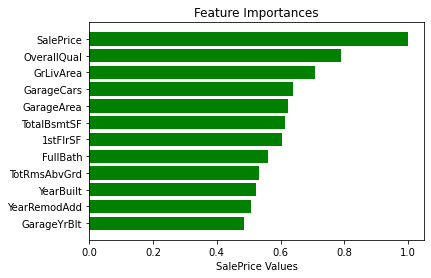

<ipython-input-21-dadce53ef212>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Feature Importances.png', figsize=(50, 40), dpi=1000)


<Figure size 432x288 with 0 Axes>

In [21]:
SalePrice = pd.DataFrame({'Features_Name':SalePrice_values.index, 'Values':SalePrice_values.values})  
#features = SalePrice['Features_Name']
#importances = rnd_clf.feature_importances_
#indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(SalePrice_values)), SalePrice['Values'][::-1], color='g', align='center')
#plt.yticks(range(len(SalePrice_values)), [features[i] for i in features])
plt.yticks(range(len(SalePrice_values)), SalePrice['Features_Name'][::-1])
plt.xlabel('SalePrice Values')  
plt.show() 
plt.savefig('Feature Importances.png', figsize=(50, 40), dpi=1000)

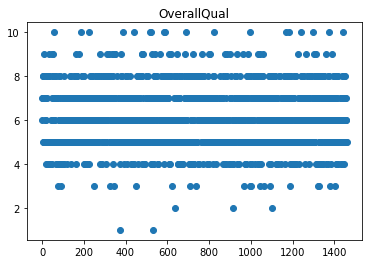

In [22]:
#Analyze the top six X features that are highly correlated with y, considering outliers
#X feature scatter plot  
plt.scatter(range(train.shape[0]),train.OverallQual.values)
plt.title('OverallQual')
plt.show()

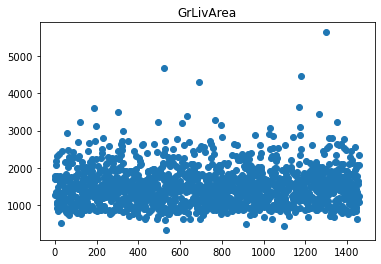

In [23]:
#X characteristic scatter plot, find outliers, remove more than 4000
plt.scatter(range(train.shape[0]),train.GrLivArea.values)  
plt.title('GrLivArea')
plt.show()

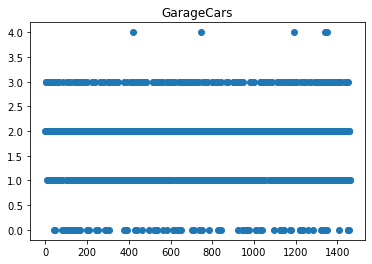

In [24]:
#X characteristic scatter plot 
plt.scatter(range(train.shape[0]),train.GarageCars.values)
plt.title('GarageCars')
plt.show()

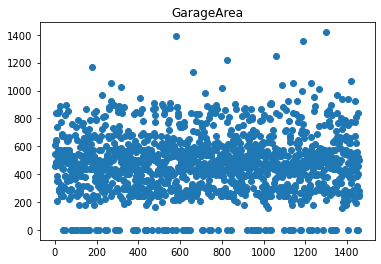

In [25]:
#X characteristic scatter plot, find outliers, remove more than 1000
plt.scatter(range(train.shape[0]),train.GarageArea.values)
plt.title('GarageArea')
plt.show()

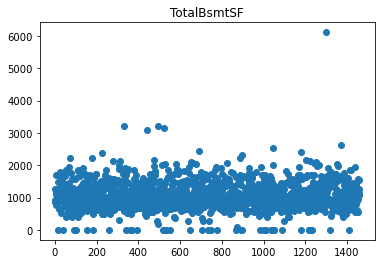

In [26]:
#X characteristic scatter plot, find outliers, remove more than 2200
plt.scatter(range(train.shape[0]),train.TotalBsmtSF.values)
plt.title('TotalBsmtSF')
plt.show()

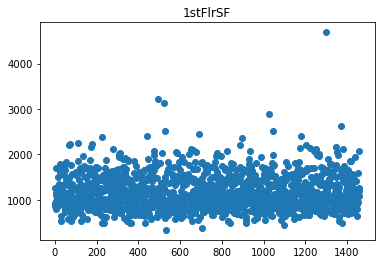

In [27]:
#X characteristic scatter plot, find outliers, remove more than 3000
plt.scatter(range(train.shape[0]),train['1stFlrSF'].values)
plt.title('1stFlrSF')
plt.show()

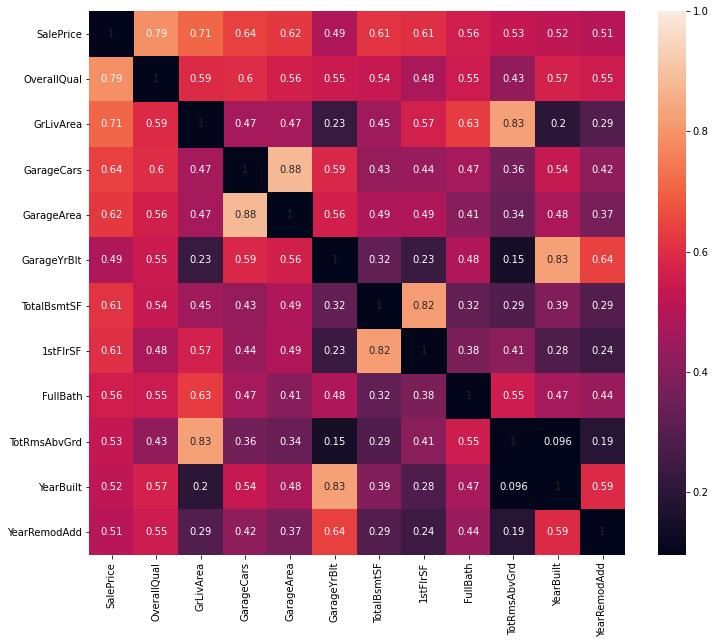

In [28]:
#View heat maps of related attributes over 0.5
corr=train[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageArea","GarageYrBlt","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]].corr()

plt.subplots(figsize = (12,10))
#annot：Boolean or rectangular data set, if it is True, the data value is written into each cell. If the shape of an array is the same as the data shape,
#use it to annotate the heat map instead of the original data.
sns.heatmap(corr,annot = True)
#mask,If passed, the data will not be displayed in the cells whose mask is True, and the cells with missing values ​​will be automatically masked; 
#cbar: Boolean value, optional whether to draw color bars
sns.heatmap(corr,mask=corr < 1, cbar=False)
plt.savefig('Amse_house_coor.png')
plt.show()

C:\Users\PC\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


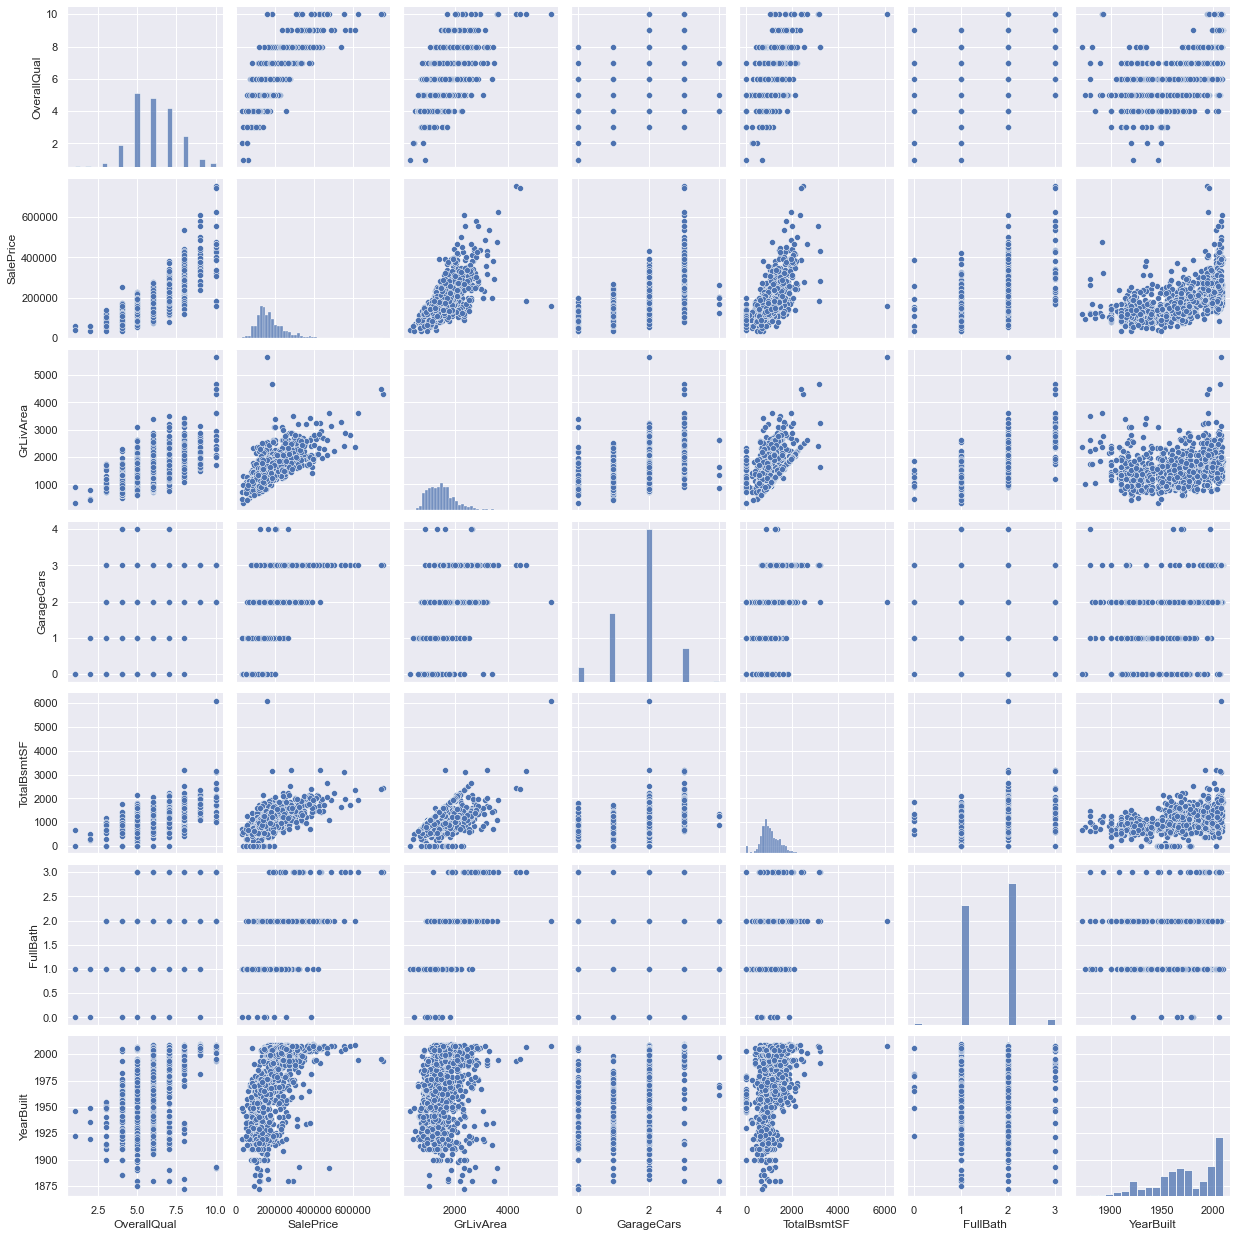

In [29]:
#View a few of the most relevant distribution graphs
sns.set()
cols = ['OverallQual','SalePrice', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
#Multivariate mapping, the same two variables are displayed in the form of histograms, 
#the differences are displayed in scattered points
sns.pairplot(train[cols], size = 2.5)  
plt.show()

In [30]:
#X feature correlation       sorting observation
cols=train.columns           #feature name
threshold = 0.5              #Correlation coefficient threshold
corr_list = []                # Coefficient storage
size = data_corr.shape[0]    #Feature rows

#Lookup coefficient
for i in range(0, size): #Feature range
    for j in range(i+1,size): #Prevent duplication
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort         
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#print
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

MasVnrArea and ExterQual = 0.88
Alley and MasVnrType = 0.83
HouseStyle and Exterior1st = 0.83
Neighborhood and Condition1 = 0.82
LotArea and BsmtUnfSF = 0.79
HouseStyle and BsmtUnfSF = 0.71
Condition2 and HouseStyle = 0.69
RoofStyle and Exterior1st = 0.68
Utilities and OverallQual = 0.65
LotShape and MasVnrType = 0.64
MasVnrArea and BsmtUnfSF = 0.64
HouseStyle and YearBuilt = 0.63
ExterQual and BsmtUnfSF = 0.62
Condition2 and Exterior1st = 0.62
Neighborhood and BsmtUnfSF = 0.61
Condition2 and YearRemodAdd = 0.61
Condition1 and BsmtUnfSF = 0.61
LotArea and MasVnrArea = 0.60
LotArea and HouseStyle = 0.59
Alley and LotShape = 0.59
MasVnrType and MasVnrArea = 0.59
LotArea and Alley = 0.57
Condition1 and HouseStyle = 0.57
MasVnrType and ExterQual = 0.56
LotArea and ExterQual = 0.56
YearBuilt and BsmtUnfSF = 0.56
YearBuilt and Exterior1st = 0.55
LotArea and LotShape = 0.55
LotArea and YearBuilt = 0.55
LotArea and MasVnrType = 0.55
Alley and MasVnrArea = 0.54
LotArea and Neighborhood = 0.54
E

3.Feature engineering

3.1 Lost feature (solve multicollinearity)

In [31]:
#Throw away the four pairs of features with a correlation greater than 0.8 and only take one and Id
train = train.drop(['GarageCars','YearBuilt','TotRmsAbvGrd','1stFlrSF','Id'],1)
test = test.drop(['GarageCars','YearBuilt','TotRmsAbvGrd','1stFlrSF','Id'],1)

3.2Outlier processing

In [32]:
#Outlier processing (delete directly)
train = train.drop(train[(train['GrLivArea']>4000) | (train['GarageArea']>1200)|(train['TotalBsmtSF']>2200)|(train['SalePrice']>400000)].index)


3.3missing values processing

In [33]:
# the number of missing values
total = train.isnull().sum().sort_values(ascending=False)  #descending sort
total.head(20)

PoolQC          1416
MiscFeature     1368
Alley           1330
Fence           1143
FireplaceQu      689
LotFrontage      256
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType2      37
BsmtFinType1      37
MasVnrArea         7
MasVnrType         7
Electrical         1
MSSubClass         0
dtype: int64

In [34]:
#Lose the top 5 features of the null value
train = train.drop(['MiscFeature','Alley','Fence','PoolQC','FireplaceQu'],axis = 1)
test = test.drop(['MiscFeature','Alley','Fence','PoolQC','FireplaceQu'],axis = 1)

In [35]:
#Fill in missing values
train = train.fillna(train.mean())
test = test.fillna(test.mean())

3.4 one-hot

In [36]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0


3.5 Separate X and y

In [37]:
y = train['SalePrice'].values
#Take log for y
y_log = np.log(train['SalePrice'])
X = train.drop("SalePrice",1)

3.6 Divide the test set and training set

In [38]:
from sklearn.model_selection import train_test_split   #Cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 33, test_size = 0.2)#random_state，它的用途是在随机划分训练集和测试集时候，划分的结果并不是那么随机，也即，确定下来random_state是某个值后，重复调用这个函数，划分结果是确定的
#X_train, X_test, y_train, y_test = train_test_split(X, y_log, random_state = 32, test_size = 0.2)

3.7 Data standardization

In [39]:
#Initialize the normalizers for features and target values separately
ss_X = StandardScaler()
ss_y = StandardScaler()

X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

y_train = ss_y.fit_transform(y_train.reshape(-1, 1))
y_test = ss_y.transform(y_test.reshape(-1, 1))

4.Model training<br>
4.1Linear Regression(Least squares)

In [40]:
#Linear regression
#example
lr = LinearRegression()
#training
lr.fit(X_train,y_train)
#predict
y_test_pre_lr = lr.predict(X_test)
y_train_pre_lr = lr.predict(X_train)
#Evaluate
print('the r2 score of Linear on test is:',r2_score(y_test,y_test_pre_lr))
print('the r2 score of Linear on train is:',r2_score(y_train,y_train_pre_lr))

the r2 score of Linear on test is: -1.9617340801911775e+23
the r2 score of Linear on train is: 0.9394382915023809


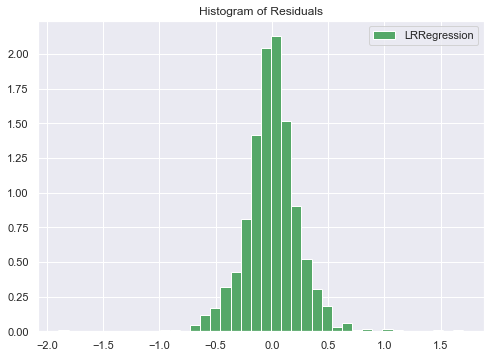

In [41]:
#Residual histogram 
f, ax = plt.subplots(figsize=(7, 5))
f.tight_layout()
ax.hist(y_train - y_train_pre_lr, bins = 40, label = 'LRRegression', color = "g", density = True,stacked = True)
ax.set_title("Histogram of Residuals")
ax.legend(loc = 'best')
plt.show()

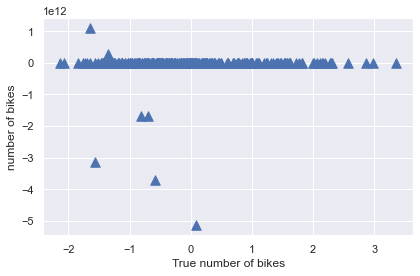

In [42]:
#Observe the scatter plot of predicted and true values
#plt.figure(figsize=(4, 3))
#plt.scatter(y_test, y_test_pre_lr)
plt.scatter(y_test,y_test_pre_lr,marker='^',s=90)
#ax.scatter(y_test_pre_lr,marker='o',s=50,c='red')
#plt.plot([-3, 3], [-3, 3], '--k')   #The data has been standardized, 3 times the standard deviation is enough
plt.axis('tight')
plt.xlabel('True number of bikes')
plt.ylabel('number of bikes')
plt.tight_layout()
plt.show()

4.2 Ridge regression

In [43]:
#Regular parameter
# higher the alpha value, more restriction on the coefficients; 
#low alpha > more generalization,
alphas = [ 0.01, 0.1, 1, 10,100,1000]
#example
Ridge = RidgeCV(alphas = alphas,store_cv_values=True)
#training
Ridge.fit(X_train,y_train)
#prediction
y_test_pre_ridge = Ridge.predict(X_test)
y_train_pre_ridge = Ridge.predict(X_train)
#evaluation
print('the r2 score of ridge on test is:',r2_score(y_test,y_test_pre_ridge))
print('the r2 score of ridge on train is:',r2_score(y_train,y_train_pre_ridge))

the r2 score of ridge on test is: 0.9144970982235182
the r2 score of ridge on train is: 0.935840527176415


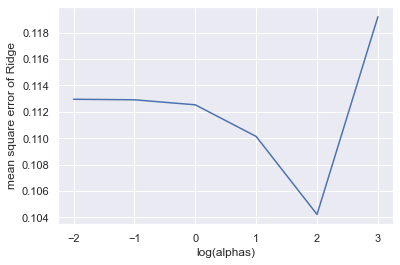

alphas is: 100.0


In [44]:
#Visualize & mse mean square error
mse_mean = np.mean(Ridge.cv_values_,axis = 0)
plt.figure()
plt.plot(np.log10(alphas),mse_mean.reshape(len(alphas),1))
plt.xlabel('log(alphas)')
plt.ylabel('mean square error of Ridge')
plt.show()
#Optimal parameters
print('alphas is:',Ridge.alpha_)

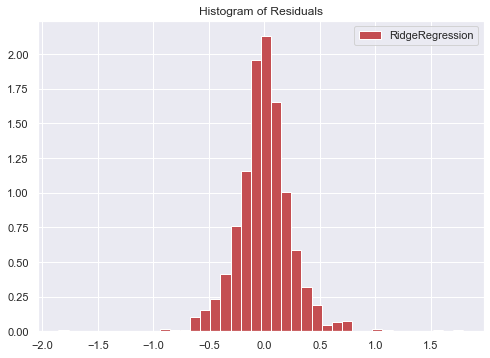

In [45]:
#Residual histogram
f, ax = plt.subplots(figsize=(7, 5))
f.tight_layout()
ax.hist(y_train - y_train_pre_ridge, bins = 40, label = 'RidgeRegression', color = "r",  density = True,stacked = True)
ax.set_title("Histogram of Residuals")
ax.legend(loc = 'best')
plt.show()

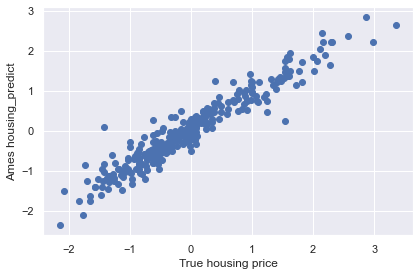

In [46]:
#Observe the scatter plot of predicted and true values
#plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_test_pre_ridge)
#plt.plot([-3, 3], [-3, 3], '--k')   #The data has been standardized, 3 times the standard deviation is enough
plt.axis('tight')
plt.xlabel('True housing price')
plt.ylabel('Ames housing_predict')
plt.tight_layout()
plt.show()

4.3 Lasso regression

In [47]:
#Generate example & Set parameter range
lasso = LassoCV(alphas =[0.0001,0.001,0.01, 0.1, 1,])  
#eps=0.0001, n_alphas=100000
lasso.fit(X_train, y_train)  
#test
y_test_pred_lasso = lasso.predict(X_test)
y_train_pred_lasso = lasso.predict(X_train)
# Evaluation, 
#use r2_score to evaluate the performance of the model on the test set and training set
print ('The r2 score of LassoCV on test is', r2_score(y_test, y_test_pred_lasso))
print ('The r2 score of LassoCV on train is', r2_score(y_train, y_train_pred_lasso))

C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1274649760652551, tolerance: 0.08656574387844049
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1580322706152799, tolerance: 0.09105411507404931
  model = cd_fast.enet_coordinate_descent_gram(


The r2 score of LassoCV on test is 0.9110368167731275
The r2 score of LassoCV on train is 0.9264956792123208


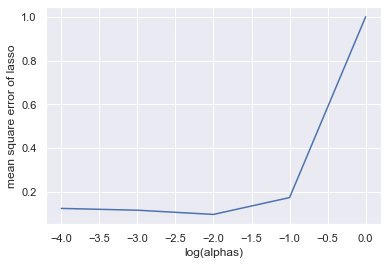

alphas is: 0.01


In [48]:
#Visualize & mse mean square error
mse = np.mean(lasso.mse_path_,axis = 1)
plt.plot(np.log10(lasso.alphas_),mse)
plt.xlabel('log(alphas)')
plt.ylabel('mean square error of lasso')
plt.show()
print('alphas is:',lasso.alpha_)

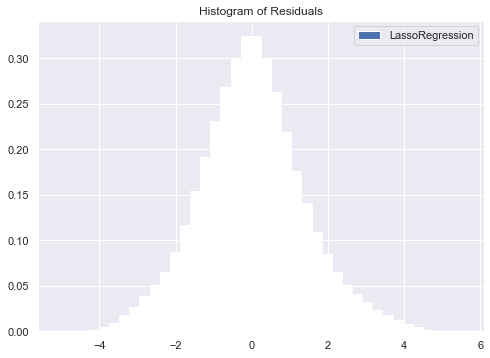

In [53]:
#Residual histogram
f, ax = plt.subplots(figsize=(7, 5))
f.tight_layout()
ax.hist(y_train - y_train_pred_lasso, bins = 40, label = 'LassoRegression', density = True,stacked = True)
ax.set_title("Histogram of Residuals")
ax.legend(loc = 'best')
plt.show()

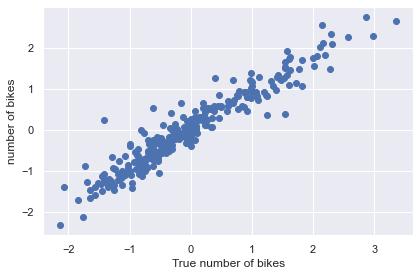

In [50]:
#Observe the scatter plot of predicted and true values
#plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_test_pred_lasso)
#plt.plot([-3, 3], [-3, 3], '--k')   
#The data has been standardized, 3 times the standard deviation is enough
plt.axis('tight')
plt.xlabel('True number of bikes')
plt.ylabel('number of bikes')
plt.tight_layout()

5.Model evaluation and selection

In [ ]:
#I choose Ridge regression